#### Program Name: sonar-rock-mine-prediction.ipynb
#### Purpose: predicts whether a sonar detected by a submarine emmanatting from an object is a rock or a mine
#### Author: Momodou Jallow

### PROBLEM STATEMENT
During war a submarine should be able to distinguish Rocks from Mines implanted in the sea-bed by the enemy based on sonar radar.

### WORK FLOW
Sonar data is provided. We will preprocess the data and then split the data into training and test data for our machine learning model.We are using a Logistic Regression model for this problem because it is a binary classification problem. After training the Logistic Regression model, we would build a predictive system and provide a new data for it to predict whether the object is a rock or a mine.

#### Import the dependencies

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Processing

In [16]:
sonar_data = pd.read_csv("sonar data.csv", header = None)
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [17]:
# Number of rows and columns
sonar_data.shape

(208, 61)

In [18]:
# Basic information about the data
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [19]:
# Summary statistics about the data
sonar_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
1,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
2,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
3,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
4,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
5,208.0,0.104570,0.059105,0.0102,0.067025,0.09215,0.134125,0.3823
6,208.0,0.121747,0.061788,0.0033,0.080900,0.10695,0.154000,0.3729
7,208.0,0.134799,0.085152,0.0055,0.080425,0.11210,0.169600,0.4590
8,208.0,0.178003,0.118387,0.0075,0.097025,0.15225,0.233425,0.6828
9,208.0,0.208259,0.134416,0.0113,0.111275,0.18240,0.268700,0.7106


In [20]:
# Number of rock and mine labels in the data
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

Mine appears in our data a hundered and eleven times whereas Rock appears ninety-seven times.

In [21]:
# Check for null values
sonar_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<Axes: >

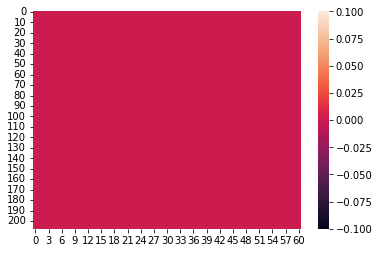

In [22]:
sns.heatmap(sonar_data.isnull())

We can see that all is clear maroon, indicating that there are no null values in our data.

#### Separating the Target Variable from the Rest of the Data

In [23]:
X = sonar_data.drop(columns = 60, axis = 1)
y = sonar_data[60]

#### Split the Data into Training and Test Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=1)

#### Machine Learning Model: **Logistic Regression Model**

In [25]:
# model instantiation
log_reg_model = LogisticRegression()
# Train the logistic regression model
log_reg_model.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [26]:
# accuracy on training data
X_train_predictions = log_reg_model.predict(X_train)
training_data_accuracy_score = accuracy_score(y_train, X_train_predictions)
training_data_accuracy_score

0.8342245989304813

In [27]:
# accuracy on test data
X_test_predictions = log_reg_model.predict(X_test)
test_data_accuracy_score = accuracy_score(y_test, X_test_predictions)
test_data_accuracy_score

0.7619047619047619

Our model is a fairly robust one since the accuracy score on test data is not very different from accuracy on the training data.

#### Making a Predictive System

In [28]:
input_data = (0.0443,0.0446,0.0235,0.1008,0.2252,0.2611,0.2061,0.1668,0.1801,0.3083,0.3794,0.5364,0.6173,0.7842,0.8392,0.9016,1.0000,0.8911,0.8753,0.7886,0.7156,0.7581,0.6372,0.3210,0.2076,0.2279,0.3309,0.2847,0.1949,0.1671,0.1025,0.1362,0.2212,0.1124,0.1677,0.1039,0.2562,0.2624,0.2236,0.1180,0.1103,0.2831,0.2385,0.0255,0.1967,0.1483,0.0434,0.0627,0.0513,0.0473,0.0248,0.0274,0.0205,0.0141,0.0185,0.0055,0.0045,0.0115,0.0152,0.0100)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
predictions = log_reg_model.predict(input_data)
if(predictions[0]== "R"):
    print("The object is a rock.")
else:
    print("The object is a mine!!!")

The object is a mine!!!
